In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.sparse import csr_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Load dataset
df = pd.read_csv("D:/Bookify.com/New folder/Database/database/cleaned_datasets/processed_reviews.csv")

df

C:\Users\ramya\AppData\Local\Temp\ipykernel_15756\1136658433.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Bookify.com/New folder/Database/database/cleaned_datasets/processed_reviews.csv")


,review_id,platform,asin,book_name,author,reviewer_name,review_title,review_text,rating,review_date,...,verified,helpful,combined_review,cleaned,no_stopwords,lemmatized,tokens,joined,w2v_vector,sentiment
0,48235e132322f1f1d38273eb33bde48f,Amazon,B0033UV8HI,Not Available,Not Available,Ridley,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",3,2010-09-02,...,False,"[8, 10]",Entertaining But Average Jace Rankin may be sh...,entertaining but average jace rankin may be sh...,entertaining average jace rankin may short hes...,entertaining average jace rankin may short he ...,"['entertaining', 'average', 'jace', 'rankin', ...",entertaining average jace rankin may short he ...,[-0.36792505 -0.9909726 0.27137458 0.034692...,neutral
1,ef97bbe96ff2ffe7dfb0852e39a0e1ea,Amazon,B002HJV4DE,Not Available,Not Available,Holly Butler,Terrific menage scenes!,Great short read. I didn't want to put it dow...,5,2013-10-08,...,False,"[1, 1]",Terrific menage scenes! Great short read. I d...,terrific menage scenes great short read i didn...,terrific menage scenes great short read didnt ...,terrific menage scene great short read didnt w...,"['terrific', 'menage', 'scene', 'great', 'shor...",terrific menage scene great short read didnt w...,[-0.5433881 -1.7709152 0.67714506 -0.005419...,positive
2,ffa408e5333fda43220110b396f469d9,Amazon,B002ZG96I4,Not Available,Not Available,Merissa,Snapdragon Alley,I'll start by saying this is the first of four...,3,2014-04-11,...,False,"[0, 0]",Snapdragon Alley I'll start by saying this is ...,snapdragon alley ill start by saying this is t...,snapdragon alley ill start saying first four b...,snapdragon alley ill start saying first four b...,"['snapdragon', 'alley', 'ill', 'start', 'sayin...",snapdragon alley ill start saying first four b...,[-0.26081926 -1.2878057 0.27687296 0.119117...,neutral
3,d5b5ad9a44016bc335af15c715efa85d,Amazon,B002QHWOEU,Not Available,Not Available,Cleargrace,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,3,2014-07-05,...,False,"[1, 3]",very light murder cozy Aggie is Angela Lansbur...,very light murder cozy aggie is angela lansbur...,light murder cozy aggie angela lansbury carrie...,light murder cozy aggie angela lansbury carry ...,"['light', 'murder', 'cozy', 'aggie', 'angela',...",light murder cozy aggie angela lansbury carry ...,[-0.474576 -1.2394472 0.23362859 -0.098878...,neutral
4,6f54882f555c3a31bf0bc5a2d007e1e8,Amazon,B001A06VJ8,Not Available,Not Available,Rjostler,Book,I did not expect this type of book to be in li...,4,2012-12-31,...,False,"[0, 1]",Book I did not expect this type of book to be ...,book i did not expect this type of book to be ...,book expect type book library pleased find pri...,book expect type book library pleased find pri...,"['book', 'expect', 'type', 'book', 'library', ...",book expect type book library pleased find pri...,[ 0.35064948 -1.2930781 0.01877313 0.345010...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,0bbafa54ee3f1f8485989d717f8e0285,CustomerReviews,1492646318,How to Catch an Elf,Adam Wallace,Carol Mccoy,A cute Christmas book for STEM,Definitely a cute read aloud book to get kids ...,5,2023-09-04,...,1.0,0,A cute Christmas book for STEM Definitely a cu...,a cute christmas book for stem definitely a cu...,cute christmas book stem definitely cute read ...,cute christmas book stem definitely cute read ...,"['cute', 'christmas', 'book', 'stem', 'definit...",cute christmas book stem definitely cute read ...,[-0.16936101 -0.6945811 0.3211885 -0.084966...,positive
79463,7898c8d5febb0343f769a569dbd086a8,CustomerReviews,1501161938,The Seven Husbands of Evelyn Hugo: A Novel,Morgan Housel,Chelscey,Hollywood hasn't changed much,Starting at the young age of fourteen and endi...,5,2022-04-25,...,1.0,0,Hollywood hasn't changed much Starting at the ...,hollywood hasnt changed much starting at the y...,hollywood hasnt changed much starting young ag...,hollyw

In [6]:
# PART 1: TF-IDF Vectorization 

print("\nTF-IDF")

# Example configuration
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, min_df=5, max_df=0.8)
X_tfidf = vectorizer.fit_transform(df['joined'])

print("TF-IDF Feature Matrix:")
print("Shape:", X_tfidf.shape)
print("Sparsity: {:.2f}%".format(100.0 * (1.0 - X_tfidf.count_nonzero() / (X_tfidf.shape[0] * X_tfidf.shape[1]))))


TF-IDF
TF-IDF Feature Matrix:
Shape: (79467, 1000)
Sparsity: 94.99%


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example: TF-IDF features used
X = X_tfidf  # or use review_vectors for Word2Vec
y = df['sentiment']  # Make sure this is encoded (e.g., LabelEncoder)

# Label encode sentiments
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [8]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_log = logistic_model.predict(X_test)


In [9]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
calibrated_svm = CalibratedClassifierCV(svm_model)
calibrated_svm.fit(X_train, y_train)

y_pred = calibrated_svm.predict(X_test)


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [12]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()


In [15]:
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("SVM", y_test, y_pred)
evaluate_model("Random Forest", y_test, y_pred_rf)

--- Logistic Regression ---
Accuracy: 0.7202088838555429
F1 Score: 0.6451060778266624
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.20      0.30      2928
     neutral       0.48      0.02      0.05      1815
    positive       0.73      0.97      0.83     11151

    accuracy                           0.72     15894
   macro avg       0.60      0.40      0.39     15894
weighted avg       0.68      0.72      0.65     15894

Confusion Matrix:
 [[  586    25  2317]
 [  109    44  1662]
 [  312    22 10817]]

--- SVM ---
Accuracy: 0.7195797156159557
F1 Score: 0.6343317822745661
Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.16      0.26      2928
     neutral       0.48      0.01      0.01      1815
    positive       0.72      0.98      0.83     11151

    accuracy                           0.72     15894
   macro avg       0.61      0.38      0.37     15894
weigh

In [16]:
joblib.dump(logistic_model, "logistic_model_v1.joblib")
joblib.dump(svm_model, "svm_model_v1.joblib")
joblib.dump(rf_model, "rf_model_v1.joblib")
joblib.dump(le, "label_encoder.joblib")  


['label_encoder.joblib']

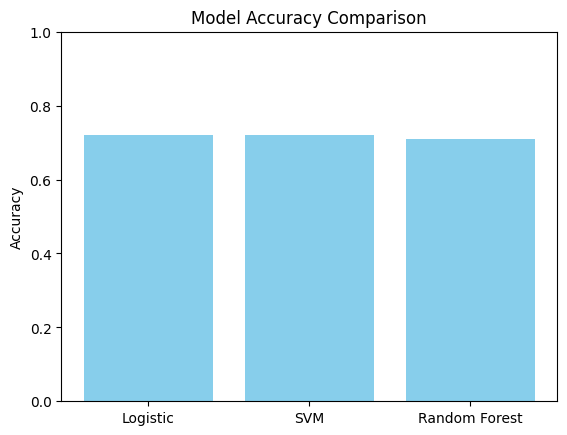

In [18]:
import matplotlib.pyplot as plt

models = ['Logistic', 'SVM', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_log),
              accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_rf)]

plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
